In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [6]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
new_column_names = {}
for col in data.columns:
    new_col = col.lower().replace(' ', '_')
    new_column_names[col] = new_col

data = data.rename(columns=new_column_names)

In [8]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
numerical_data = data.select_dtypes(include=[np.number])

In [11]:
numerical_data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [17]:
def differentiate_variables(df):
    continuous_cols = []
    discrete_cols = []

    for col in numerical_data.columns:
        if numerical_data[col].nunique() <= 20:
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)

    continuous_df = numerical_data[continuous_cols]
    discrete_df = numerical_data[discrete_cols]

    return continuous_df, discrete_df

In [18]:
continuous_df, discrete_df = differentiate_variables(numerical_data)
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


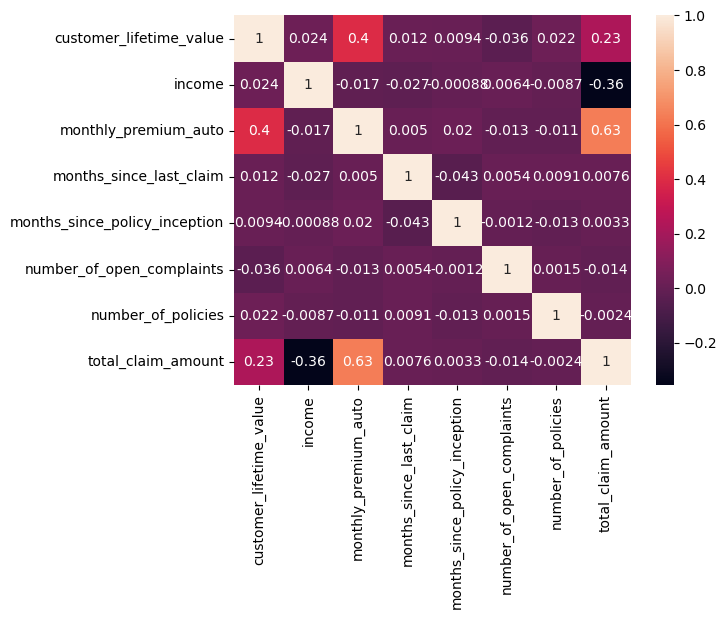

In [19]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Total claim amount and monthly premium auto have a big correlation. Monthly Premium Auto and Customer Lifetime Value have a moderate correlation. All the others have low correlation

In [22]:
def plot_discrete_variables(df):
    for var in discrete_df:
        plt.figure()
        discrete_df[var].value_counts().plot(kind='bar')
        plt.title(var)
        plt.show()

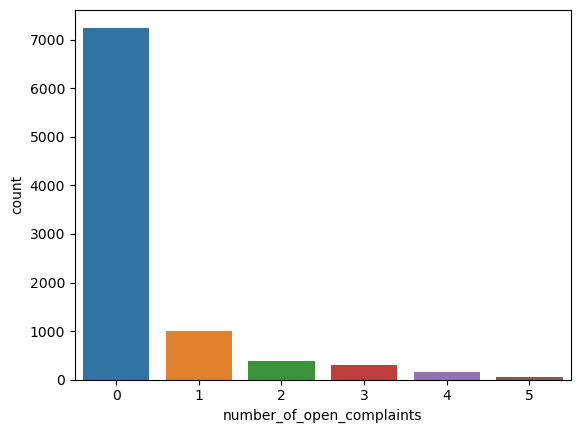

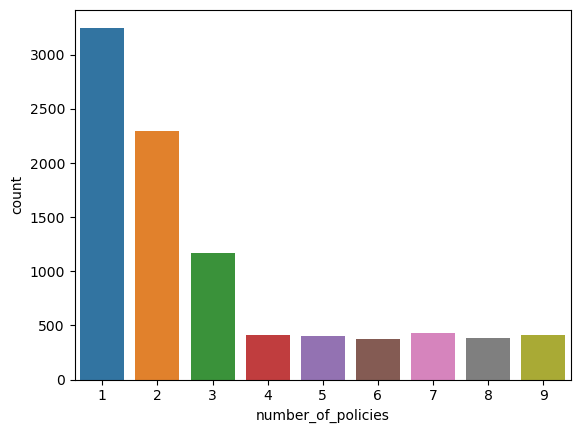

In [23]:
plot_discrete(discrete_df)

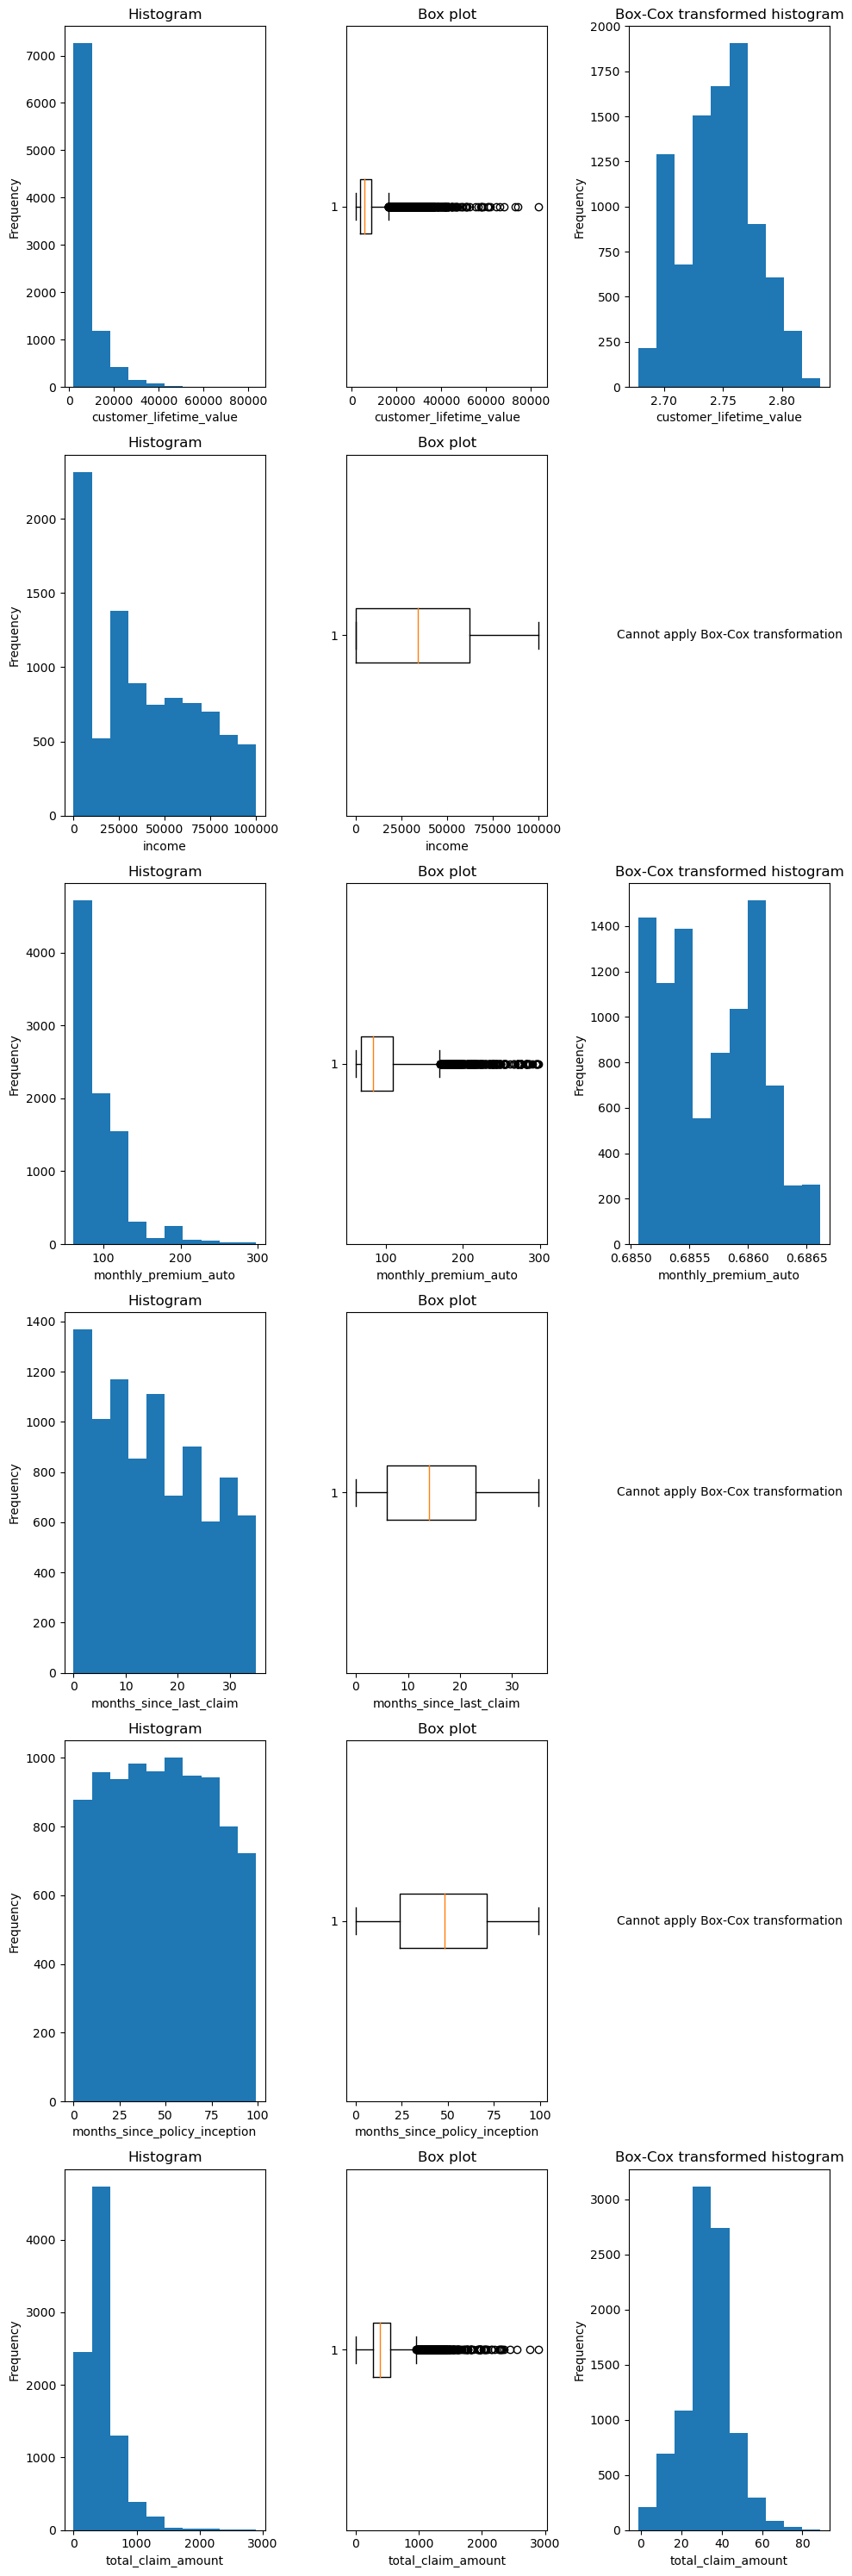

In [24]:
# select continuous variables
cont_vars = continuous_df.columns

from scipy.stats import boxcox

def plot_continuous_vars(df, cont_vars):
    # create subplots
    fig, axs = plt.subplots(nrows=len(cont_vars), ncols=3, figsize=(10, 5*len(cont_vars)))

    # loop over continuous variables and plot
    for i, col in enumerate(cont_vars):
        # plot histogram in first row, first column
        axs[i, 0].hist(df[col])
        axs[i, 0].set_title('Histogram')
        axs[i, 0].set_xlabel(col)
        axs[i, 0].set_ylabel('Frequency')

        # plot box plot in first row, second column
        axs[i, 1].boxplot(df[col], vert=False)
        axs[i, 1].set_title('Box plot')
        axs[i, 1].set_xlabel(col)

        # apply box-cox transformation and plot histogram in second row, first column
        if df[col].min() > 0:
            data, _ = boxcox(df[col])
            axs[i, 2].hist(data)
            axs[i, 2].set_title('Box-Cox transformed histogram')
            axs[i, 2].set_xlabel(col)
            axs[i, 2].set_ylabel('Frequency')
        else:
            axs[i, 2].text(0.5, 0.5, 'Cannot apply Box-Cox transformation', ha='center', va='center')
            axs[i, 2].axis('off')

    # adjust spacing between subplots
    plt.tight_layout()

    # show plot
    plt.show()
    
plot_continuous_vars(continuous_df, cont_vars)

A lot of columns have outliers

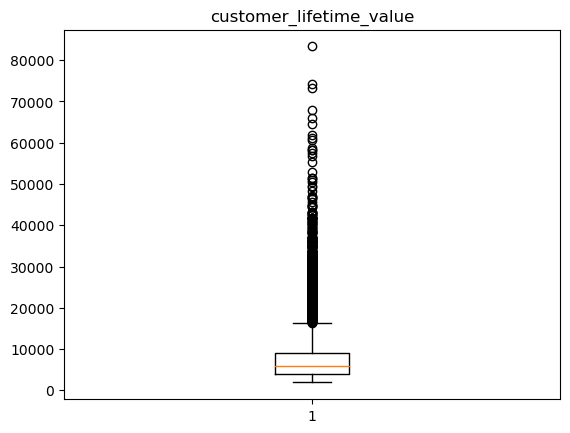

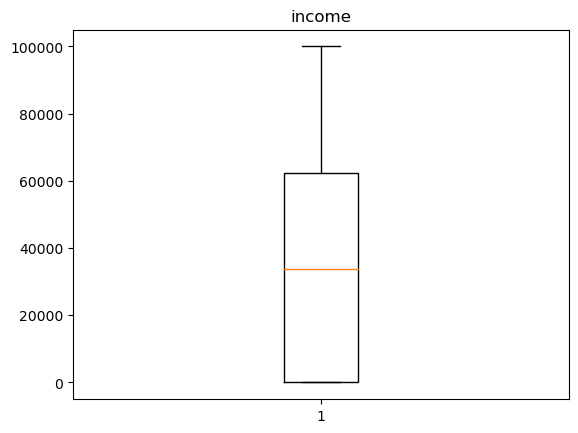

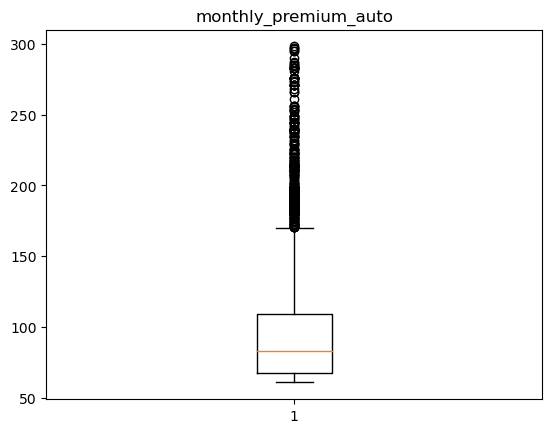

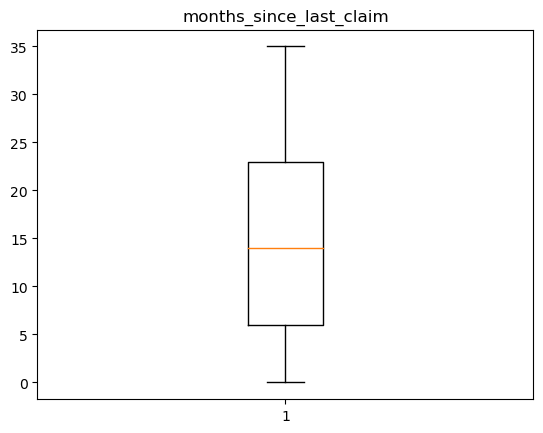

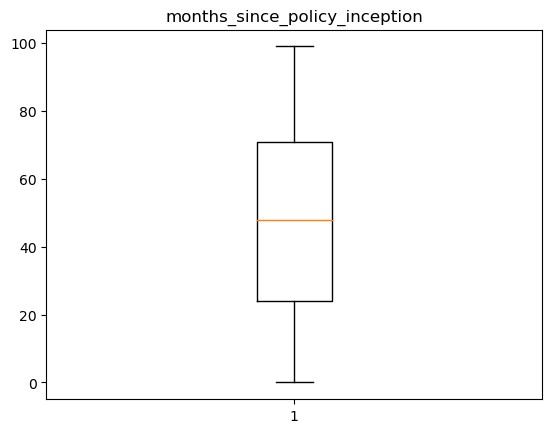

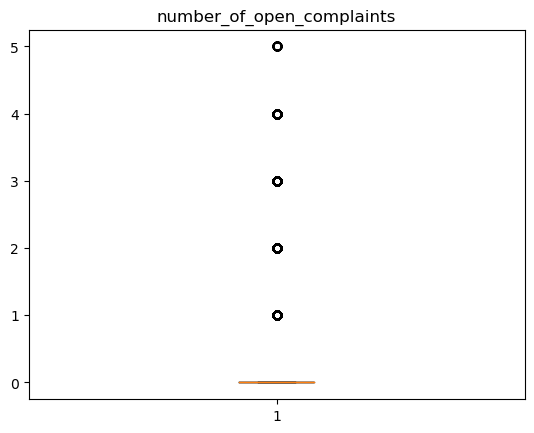

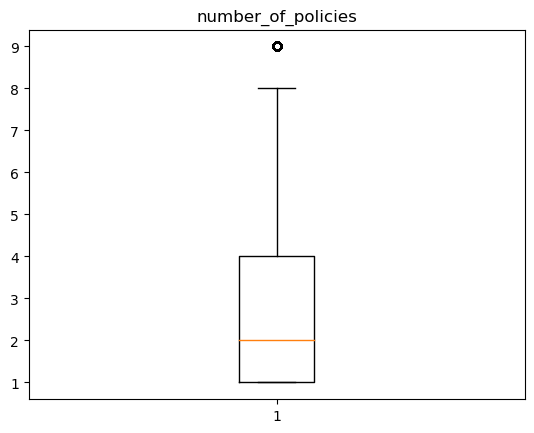

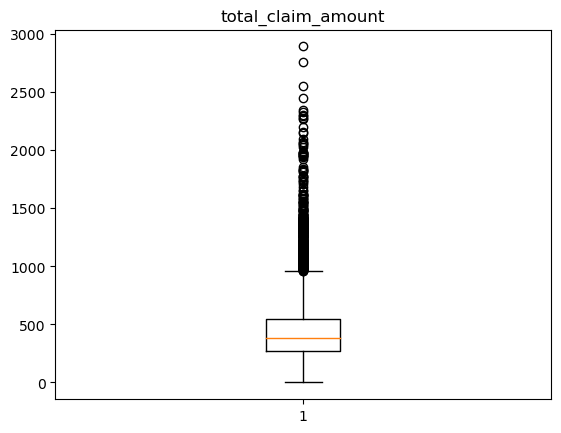

In [25]:
for col in numerical_data.columns:
    plt.boxplot(numerical_data[col])
    plt.title(col)
    plt.show()

We have a lot of outliers but, on this case, all the data are relevant so we should not drop them

In [29]:
(data.isna().sum()/len(data)).sort_values(ascending=False)

customer                         0.0
state                            0.0
vehicle_class                    0.0
total_claim_amount               0.0
sales_channel                    0.0
renew_offer_type                 0.0
policy                           0.0
policy_type                      0.0
number_of_policies               0.0
number_of_open_complaints        0.0
months_since_policy_inception    0.0
months_since_last_claim          0.0
monthly_premium_auto             0.0
marital_status                   0.0
location_code                    0.0
income                           0.0
gender                           0.0
employmentstatus                 0.0
effective_to_date                0.0
education                        0.0
coverage                         0.0
response                         0.0
customer_lifetime_value          0.0
vehicle_size                     0.0
dtype: float64

In [31]:
numerical_data.to_csv("numerical.csv")